In [ ]:
import numpy
class LinearRegressionModel:
  W=0
  def __init__(self, shape):
    self.W = numpy.zeros((shape+1,1))

  def fit(self, X, Y):
    # augmenting X
    X = numpy.concatenate((numpy.ones((X.shape[0],1)), X), axis=1)
    self.W = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(X.T, X)), X.T), Y)

  def predict(self, X):
    # augment X
    X = numpy.concatenate((numpy.ones((X.shape[0],1)), X), axis=1)
    predictions = numpy.matmul(X, self.W)
    predictions[predictions < 0] = -1
    predictions[predictions >= 0] = 1
    return predictions

  def LMS_error(self, X, Y):
    # augment X
    X = numpy.concatenate((numpy.ones((X.shape[0],1)), X), axis=1)
    return numpy.square(numpy.linalg.norm(numpy.matmul(X, self.W) - Y))

In [ ]:
X = numpy.array([[1,0,1], [0,1,1], [1,1,0], [1,1,1]])
Y = numpy.array([1,1,1,-1])
lr = LinearRegressionModel(X.shape[1])

In [ ]:
lr.fit(X, Y)

In [ ]:
test = numpy.array([[0,0,0], [1,1,1], [2,2,2]])
print(lr.predict(test))

[ 1. -1. -1.]


In [ ]:
def LMS_error(y, y_hat):
  return numpy.square(numpy.linalg.norm(y_hat - y))

# 1(a) Linear Regression

In [ ]:
def get_dataset(means, covariance, priors, train_size, test_size, covariance_1=numpy.zeros((1,1))):
  X_train_0 = numpy.random.multivariate_normal(mean=means[0], cov=covariance, size=int(train_size*priors[0]))
  X_test_0 = numpy.random.multivariate_normal(mean=means[0], cov=covariance, size=int(test_size*priors[0]))
  if covariance_1.all() != 0:
    X_train_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance_1, size=int(train_size*priors[1]))
    X_test_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance_1, size=int(test_size*priors[1]))
  else:
    X_train_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance, size=int(train_size*priors[1]))
    X_test_1 = numpy.random.multivariate_normal(mean=means[1], cov=covariance, size=int(test_size*priors[1]))
  X_train = numpy.vstack((X_train_0, X_train_1))
  X_test = numpy.vstack((X_test_0, X_test_1))

  y_train = numpy.vstack((
      numpy.repeat(-1, int(train_size*priors[0])).reshape(-1, 1),
      numpy.repeat(1, int(train_size*priors[1])).reshape(-1, 1)
  ))
  y_test = numpy.vstack((
      numpy.repeat(-1, int(test_size*priors[0])).reshape(-1, 1),
      numpy.repeat(1, int(test_size*priors[1])).reshape(-1, 1)
  ))
  return X_train, X_test, y_train, y_test

In [ ]:
D = 10
means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(1, D).reshape(-1)]
covariance = numpy.identity(D)
priors = [0.5, 0.5]
train_size, test_size = 2000, 1000
X_train, X_test, y_train, y_test = get_dataset(means, covariance, priors, train_size, test_size)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 10), (2000, 1), (1000, 10), (1000, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
# Sklearn Linear Regressor
reg = LinearRegression().fit(X_train, y_train)
predict = reg.predict(X_test)
predict[predict < 0] = -1
predict[predict >= 0] = 1


In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
predict_train = reg.predict(X_train)
predict_train[predict_train < 0] = -1
predict_train[predict_train >= 0] = 1
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

print("Sklearn Regression Model Accuracy {0:8.2f} train %".format(accuracy_score(y_train, predict_train)*100))
print("Sklearn f_1", f1_score(y_train, predict_train))
print("Sklearn f_1", f1_score(y_test, predict))
print("Sklearn Regression Model Accuracy {0:8.2f} test %".format(accuracy_score(y_test, predict)*100))

Sklearn Regression Model Accuracy    93.50 test %
Sklearn f_1 0.9340101522842639
Linear Regression Model Accuracy    93.50 % test
Linear f_1 0.9340101522842639
Sklearn Regression Model Accuracy    94.65 train %
Sklearn f_1 0.9467396714783475
Linear Regression Model Accuracy    94.65 % train
Linear f_1 0.9467396714783475


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, lr.predict(X_test)))

[[475  25]
 [ 40 460]]


In [ ]:
# Create separate datasets for comparison with varying priors
prior_values = numpy.arange(0.1,1,0.1)
accuracy_values_model = []
accuracy_values_sklearn = []
for i in range(len(prior_values)):
  print("Evaluating on prior ({0},{1})".format(round(prior_values[i],1), round(1-prior_values[i], 1)))
  D = 10
  means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(1, D).reshape(-1)]
  covariance = numpy.identity(D)
  priors = [prior_values[i], 1-prior_values[i]]
  train_size, test_size = 4000, 2000
  X_train, X_test, y_train, y_test = get_dataset(means, covariance, priors, train_size, test_size)
  lr = LinearRegressionModel(X_train.shape[1])
  lr.fit(X_train, y_train)
  reg = LinearRegression().fit(X_train, y_train)
  predict = reg.predict(X_test)
  predict[predict < 0] = -1
  predict[predict >= 0] = 1
  accuracy_values_model.append(accuracy_score(y_test, predict))
  accuracy_values_sklearn.append(round(accuracy_score(y_test, lr.predict(X_test)), 3))

Evaluating on prior (0.1,0.9)
Evaluating on prior (0.2,0.8)
Evaluating on prior (0.3,0.7)
Evaluating on prior (0.4,0.6)
Evaluating on prior (0.5,0.5)
Evaluating on prior (0.6,0.4)
Evaluating on prior (0.7,0.3)
Evaluating on prior (0.8,0.2)
Evaluating on prior (0.9,0.1)


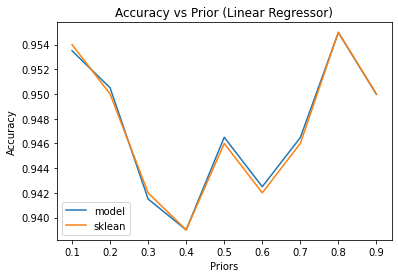

In [ ]:
import matplotlib.pyplot as plt
plt.plot(prior_values, accuracy_values_model, label="model")
plt.plot(prior_values, accuracy_values_sklearn, label="sklean")
plt.xlabel("Priors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prior (Linear Regressor)")
plt.legend()
plt.show()

#1(b) Linear Regression

In [ ]:
D = 2
means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(1, D).reshape(-1)]
covariance = numpy.identity(D)
priors = [0.5, 0.5]
train_size, test_size = 2000, 1000
X_train, X_test, y_train, y_test = get_dataset(means, covariance, priors, train_size, test_size)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 2), (2000, 1), (1000, 2), (1000, 1))

In [ ]:
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

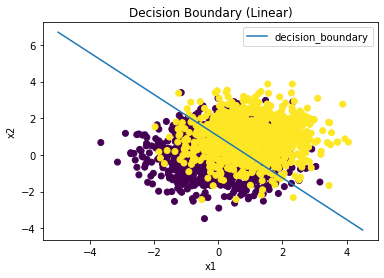

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
w_0 = lr.W[0]
w = lr.W[1:]
x = numpy.arange(-5,5,0.5)
y = (-w_0 -(x*w[0]))/w[1]
plt.plot(x,y, label="decision_boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary (Linear)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    78.80 % test
Linear f_1 0.7900990099009901
[[389 111]
 [101 399]]
Linear Regression Model Accuracy    76.30 % train
Linear f_1 0.7627627627627627


#1(c) Linear Regression

In [ ]:
D = 2
means = [numpy.repeat(0, D).reshape(-1), numpy.repeat(0, D).reshape(-1)]
covariances = [numpy.identity(D) , numpy.array([[1,0.9],[0.9,1]])]
priors = [0.5, 0.5]
train_size, test_size = 2000, 1000
X_train, X_test, y_train, y_test = get_dataset(means, covariances[0], priors, train_size, test_size, covariances[1])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 2), (2000, 1), (1000, 2), (1000, 1))

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Linear Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))

Linear Regression Model Accuracy    51.40 %


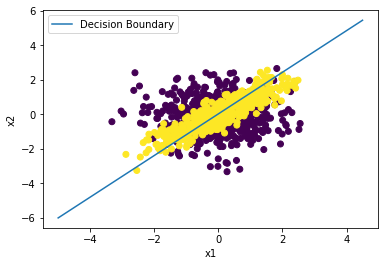

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
w_0 = lr.W[0]
w = lr.W[1:]
x = numpy.arange(-5,5,0.5)
y = (-w_0 -(x*w[0]))/w[1]
plt.plot(x,y, label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    51.40 % test
Linear f_1 0.5149700598802395
[[256 244]
 [242 258]]
Linear Regression Model Accuracy    53.50 % train
Linear f_1 0.5423228346456693


In [ ]:
X_sqr = X_train ** 2
X_sqr[:,0].reshape(-1).shape, numpy.prod(X_train, axis=1).shape, X_train[:,0].shape

((2000,), (2000,), (2000,))

In [ ]:
# feature transformation
X_train_sqr = X_train ** 2
X_test_sqr = X_test ** 2
X_train_tf = numpy.concatenate((X_train_sqr[:,0].reshape(-1,1), X_train_sqr[:,1].reshape(-1,1), numpy.prod(X_train, axis=1).reshape(-1,1), X_train[:,0].reshape(-1,1), X_train[:,1].reshape(-1,1)), axis=1)
X_test_tf = numpy.concatenate((X_test_sqr[:,0].reshape(-1,1), X_test_sqr[:,1].reshape(-1,1), numpy.prod(X_test, axis=1).reshape(-1,1), X_test[:,0].reshape(-1,1), X_test[:,1].reshape(-1,1)), axis=1)


In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train_tf.shape[1])
lr.fit(X_train_tf, y_train)

In [ ]:
print("Linear Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test_tf))*100))

Linear Regression Model Accuracy    74.30 %


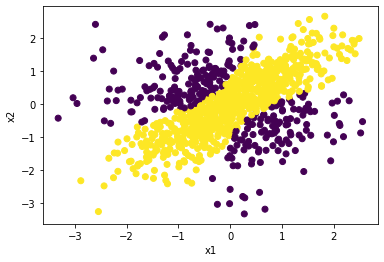

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test_tf))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test_tf))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test_tf)))
print(confusion_matrix(y_test, lr.predict(X_test_tf)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train_tf))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train_tf)))

Linear Regression Model Accuracy    74.30 % test
Linear f_1 0.7874276261373035
[[267 233]
 [ 24 476]]
Linear Regression Model Accuracy    74.10 % train
Linear f_1 0.7859504132231405


#1(d)

In [ ]:
D = 2
means = [numpy.array([[3,6]]).reshape(-1), numpy.array([[3,-2]]).reshape(-1)]
covariances = [numpy.array([[0.5,0],[0,2]]) , numpy.array([[2,0],[0,2]])]
priors = [0.5, 0.5]
train_size, test_size = 4000, 2000
X_train, X_test, y_train, y_test = get_dataset(means, covariances[0], priors, train_size, test_size, covariances[1])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 2), (4000, 1), (2000, 2), (2000, 1))

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:

print("Linear Regression Model Accuracy {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))

Linear Regression Model Accuracy    99.60 %


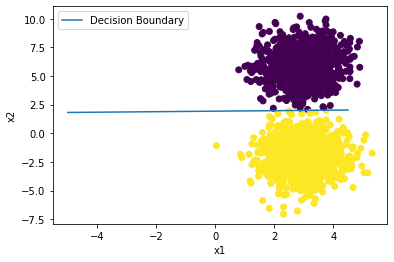

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test))
w_0 = lr.W[0]
w = lr.W[1:]
x = numpy.arange(-5,5,0.5)
y = (-w_0 -(x*w[0]))/w[1]
plt.plot(x,y, label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    99.60 % test
Linear f_1 0.995995995995996
[[997   3]
 [  5 995]]
Linear Regression Model Accuracy    99.62 % train
Linear f_1 0.9962434259954921


#2(a) Linear 

In [ ]:
data = numpy.loadtxt("german.data-numeric")

In [ ]:
X = data[:,:-1]
y = data[:,-1]
y[y==1]=-1
y[y==2]=1
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 24), (1000, 1))

## 80, 20 split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
y_test.shape, lr.predict(X_test).shape

((200, 1), (200, 1))

In [ ]:
print("Linear Regression Model Accuracy(Train) {0:8.2f} %".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear Regression Model Accuracy(Test) {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))
print(confusion_matrix(y_test, lr.predict(X_test)))

Linear Regression Model Accuracy(Train)    78.88 %
Linear Regression Model Accuracy(Test)    77.00 %
[[124  16]
 [ 30  30]]


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    77.00 % test
Linear f_1 0.5660377358490566
[[124  16]
 [ 30  30]]
Linear Regression Model Accuracy    78.88 % train
Linear f_1 0.5888077858880779


## 70, 30 split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Linear Regression Model Accuracy(Train) {0:8.2f} %".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear Regression Model Accuracy(Test) {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))
print(confusion_matrix(y_test, lr.predict(X_test)))

Linear Regression Model Accuracy(Train)    78.14 %
Linear Regression Model Accuracy(Test)    76.67 %
[[185  17]
 [ 53  45]]


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    76.67 % test
Linear f_1 0.5625000000000001
[[185  17]
 [ 53  45]]
Linear Regression Model Accuracy    78.14 % train
Linear f_1 0.5539358600583091


#3(a) Linear

In [ ]:
import pandas

dataset = pandas.read_csv("train.csv")

In [ ]:
dataset

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [ ]:
dataset.replace('',numpy.nan, inplace= True)
dataset.dropna(inplace=True)

In [ ]:
dataset.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [ ]:
dataset.shape

(595212, 59)

In [ ]:
X = dataset.iloc[:,2:].values
y = dataset["target"].values
y[y==0]=-1
y[y==1]=1
y = y.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X)

In [ ]:
X.shape, y.shape

((595212, 57), (595212, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((476169, 57), (119043, 57), (476169, 1), (119043, 1))

In [ ]:
from collections import Counter
y_count = Counter(y_train.reshape(-1))
y_count

Counter({-1: 458923, 1: 17246})

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Linear Regression Model Accuracy(Train) {0:8.2f} %".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear Regression Model Accuracy(Test) {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))
print(confusion_matrix(y_test, lr.predict(X_test)))

Linear Regression Model Accuracy(Train)    96.38 %
Linear Regression Model Accuracy(Test)    96.26 %
[[114595      0]
 [  4448      0]]


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    96.26 % test
Linear f_1 0.0
[[114595      0]
 [  4448      0]]
Linear Regression Model Accuracy    96.38 % train
Linear f_1 0.0


## Undersampling to same size

In [ ]:
dataset = pandas.read_csv("train.csv")

In [ ]:
dataset_0 = dataset[dataset["target"]==0]
dataset_1 = dataset[dataset["target"]==1]
dataset_0.shape, dataset_1.shape

((573518, 59), (21694, 59))

In [ ]:
dataset_0 = dataset_0[:len(dataset_1)]
dataset = pandas.concat([dataset_0, dataset_1], axis=0)
dataset

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595006,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,0,1,5,1,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0
595046,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,-1.000000,11,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0
595099,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,0,1,7,1,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0
595113,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,1,0,0,11,1,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0


In [ ]:
X = dataset.iloc[:,2:].values
y = dataset["target"].values
y[y==0]=-1
y[y==1]=1
y = y.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X)

## 80,20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34710, 57), (8678, 57), (34710, 1), (8678, 1))

In [ ]:
from collections import Counter
y_count = Counter(y_train.reshape(-1))
y_count

Counter({-1: 17374, 1: 17336})

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
print("Linear Regression Model Accuracy(Train) {0:8.2f} %".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear Regression Model Accuracy(Test) {0:8.2f} %".format(accuracy_score(y_test, lr.predict(X_test))*100))
print(confusion_matrix(y_test, lr.predict(X_test)))

Linear Regression Model Accuracy(Train)    59.04 %
Linear Regression Model Accuracy(Test)    59.03 %
[[2734 1586]
 [1969 2389]]


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    59.03 % test
Linear f_1 0.5733829353174127
[[2734 1586]
 [1969 2389]]
Linear Regression Model Accuracy    59.04 % train
Linear f_1 0.5737242909396175


## 70,30 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30371, 57), (13017, 57), (30371, 1), (13017, 1))

In [ ]:
# Linear Regression Model
lr = LinearRegressionModel(X_train.shape[1])
lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print("Linear Regression Model Accuracy {0:8.2f} % test".format(accuracy_score(y_test, lr.predict(X_test))*100))
print("Linear f_1", f1_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))
print("Linear Regression Model Accuracy {0:8.2f} % train".format(accuracy_score(y_train, lr.predict(X_train))*100))
print("Linear f_1", f1_score(y_train, lr.predict(X_train)))

Linear Regression Model Accuracy    58.81 % test
Linear f_1 0.5713143588103614
[[4082 2502]
 [2860 3573]]
Linear Regression Model Accuracy    59.17 % train
Linear f_1 0.5809198742861006
